# Question 1
Experimentally confirm the theoretical threshold for when an epidemic will persist in a random network — equation (18.28) in the textbook.

## Question 1a
Do Sayama Exercise 18.5. You will need to modify the update() function from code 16.6 (combined with the initialize() and observe() functions from code 16.5) in order to do this. The required modification is to turn the asynchronous update function from 16.6 into a synchronous update function — so, rather than selecting nodes at random, make sure you loop through all nodes and neighbors in the graph.




In [0]:
interactive = False

import matplotlib
if interactive:
    matplotlib.use('TkAgg')
%matplotlib inline

import random as rd
from pylab import *
import networkx as nx

class Epidemic:

    def __init__(self, prob_infected=0.5, prob_recovery=0.5):
        self.g = nx.karate_club_graph()
        self.prob_infected = prob_infected # infection probability
        self.prob_recovery = prob_recovery # recovery probability
        self.timestep = 0

    def initialize(self):
        self.g = nx.karate_club_graph()
        self.g.pos = nx.spring_layout(g)
        for i in self.g.nodes:
            self.g.nodes[i]['state'] = 1 if rd.random() < .5 else 0

    def observe(self):
        cla()
        title(f't = {str(self.timestep)}')
        nx.draw(self.g, vmin = 0, vmax = 1,
                node_color = [self.g.nodes[i]['state'] for i in self.g.nodes],
                pos = self.g.pos)
        #a = sum([g.nodes[i]['state'] for i in g.nodes]) # number of nodes that's the first color
        #b = 33 - a # number of nodes that's the seconod color
        #return(a, b) # returns the number of nodes for each color
        show()

    def update(self):
        self.timestep += 1
        for i in list(self.g.nodes):
            if self.g.nodes[i]['state'] == 0: # if the node is not yet infected
                j = rd.choice(list(self.g.neighbors(i))) # randomly select one of its neighbors
                if self.g.nodes[j]['state'] == 1: # if neighbor is infected
                    # the node will be infected if the infection probability is surpassed
                    self.g.nodes[i]['state'] = 1 if rd.random() < self.prob_infected else 0
            else: # else, if the node is already infected
                # it will become better if the recovery probabiility is reached
                self.g.nodes[i]['state'] = 0 if rd.random() < self.prob_recovery else 1
        return(self.timestep)

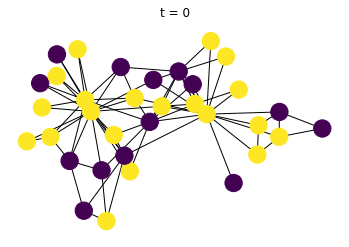

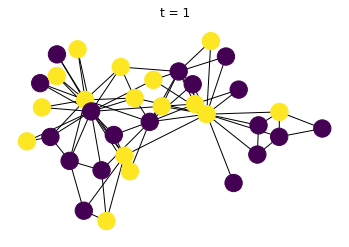

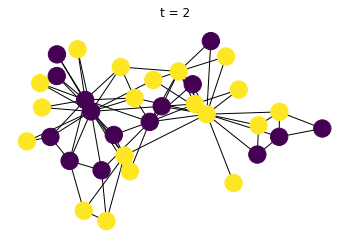

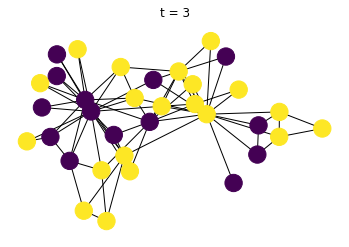

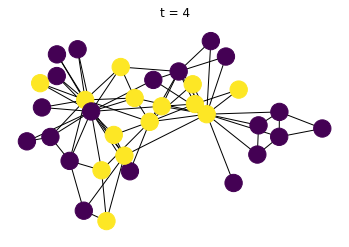

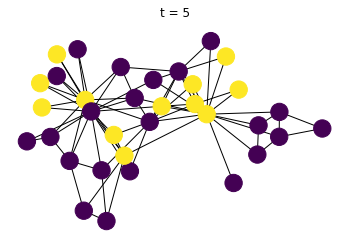

In [33]:
sim = Epidemic(prob_infected=0.5,prob_recovery=0.4)
sim.initialize()
sim.observe()

for i in range(5):
    for j in range(1):
        sim.update()
    sim.observe()

As seen from the diagrams above, the probablity of infection hsa to be higher than the probability of recovery for the disease to percolate and spread across the entire network.

## Question 1b: Why does using synchronous or asynchronous updating make a difference?

Synchronous updating allows us to make sure that all the nodes are accounted for during the ``update()`` step. On the other hand, we might miss out on nodes with asynchronous updating because we are randomly choosing nodes to apply the updates to.

## Question 1c: For the mean field approximation described in Section 18.5, why is it appropriate to use the synchronous update method and not the asynchronous one?

This is because with MFA, we are observing the network's behavior over time, and since the asynchronous updates might lead to us missing some of the nodes, this will affect the general connectivitiy of the graph and over time, might lead to severe chain reactions that could drastically change the topography of the network.

# Question 2
Experimentally confirm the “your friends have more friends than you do” observation from pp421–422 in the textbook.

## Question 2a
Generate a random network with 1000 nodes and (approximately) 20,000 edges, so that the average degree of a node is 40. Do this for each of the following types of random networks and compare your observations: Erdős­Renyi, Watts­Strogatz, Barabási­Albert random graphs.

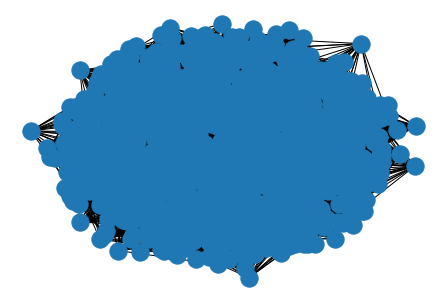

In [36]:
## ErdosRenyi

ER = nx.erdos_renyi_graph(n=1000, p=0.04)
nx.draw(ER)

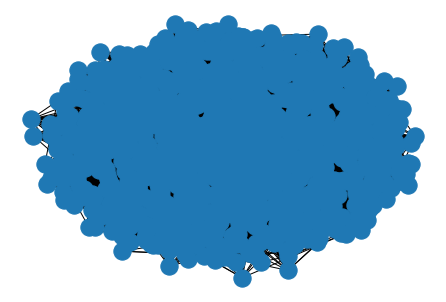

In [65]:
## BarabasiAlbert

BA = nx.barabasi_albert_graph(n=1000, m=20)
nx.draw(BA)

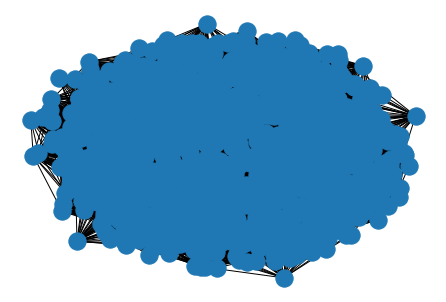

In [40]:
# WattsStrogatz 
WS = nx.watts_strogatz_graph(n=1000, k=40, p=0)
nx.draw(WS)

## Question 2b 
Write code to compute the average degree (which should be 40 — this is just to confirm that you generated the graph correctly)

In [66]:
def ave_deg(graph):
    return np.mean(list(dict(graph.degree()).values()))

print(f'The average degree of the ER graph is {ave_deg(ER)}')
print(f'The average degree of the BA graph is {ave_deg(BA)}')
print(f'The average degree of the WS graph is {ave_deg(WS)}')

The average degree of the ER graph is 39.934
The average degree of the BA graph is 39.2
The average degree of the WS graph is 40.0


## Question 2c
Write code to compute the average degree of each neighbor in the graph. To loop through all neighbors in the graph, loop through all edges and then through each node attached to an edge.

In [67]:
def ave_neighbor_deg(graph):
    return np.mean(list(nx.average_neighbor_degree(graph).values()))

print(f'The average degree of each neighbor in the ER graph is {ave_neighbor_deg(ER)}')
print(f'The average degree of each neighbor in the BA graph is {ave_neighbor_deg(BA)}')
print(f'The average degree of each neighbor in the WS graph is {ave_neighbor_deg(WS)}')

The average degree of each neighbor in the ER graph is 40.88687785131944
The average degree of each neighbor in the BA graph is 61.523584897591235
The average degree of each neighbor in the WS graph is 40.39480987690411


## Question 2d
Question: How does the average degree of neighbors (the number of friends of your friends) compare to the average degree of the graph (your number of friends)?

The average degree of each neighbor in both the ER and WS graph seem to be slightly higher than the average degree of the individual nodes, while for the BA graph it was significantly higher. This is because in a BA graph, we are attaching 20 edges from a new node to existing nodes, therefore the number of nodes for existing nodes get increasingly higher, resulting in a skewed distribution of edges. This proves the “your friends have more friends than you do” observation as proposed in the text book.